In [1]:
from google.colab import files

# Upload de kaggle.json
uploaded = files.upload()
import shutil

# Télécharger un dataset depuis Kaggle
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
import zipfile

# Définir le chemin du fichier téléchargé
zip_file = "brain-mri-images-for-brain-tumor-detection.zip"
output_dir = "/content/brain-mri-dataset"

# Extraire le contenu
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(output_dir)

print(f"Dataset extrait dans : {output_dir}")
import os

# Lister les fichiers extraits
print(os.listdir("/content/brain-mri-dataset"))


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 79% 12.0M/15.1M [00:01<00:00, 17.8MB/s]
100% 15.1M/15.1M [00:01<00:00, 12.0MB/s]
Dataset extrait dans : /content/brain-mri-dataset
['no', 'yes', 'brain_tumor_dataset']


In [2]:
import shutil
# Spécifier le chemin du dossier à supprimer
brain_tumor_path = '/content/brain-mri-dataset/brain_tumor_dataset'

# Supprimer le dossier et son contenu
shutil.rmtree(brain_tumor_path)

print(f"Le dossier {brain_tumor_path} a été supprimé avec succès.")

Le dossier /content/brain-mri-dataset/brain_tumor_dataset a été supprimé avec succès.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Spécifiez le chemin de base
base_path = '/content/brain-mri-dataset'

# Créer un générateur d'images pour prétraiter les données
datagen = ImageDataGenerator(rescale=1./255)  # Normalisation des pixels

# Créer un générateur de données pour l'entraînement
train_data = datagen.flow_from_directory(
    base_path,
    target_size=(150, 150),  # Redimensionner les images à 150x150
    batch_size=32,           # Nombre d'images par lot
    class_mode='binary'      # Pour une classification binaire ('yes' ou 'no')
)

# Afficher les classes et les informations sur le jeu de données
print(f"Classes : {train_data.class_indices}")
print(f"Nombre d'exemples : {train_data.samples}")

Found 253 images belonging to 2 classes.
Classes : {'no': 0, 'yes': 1}
Nombre d'exemples : 253


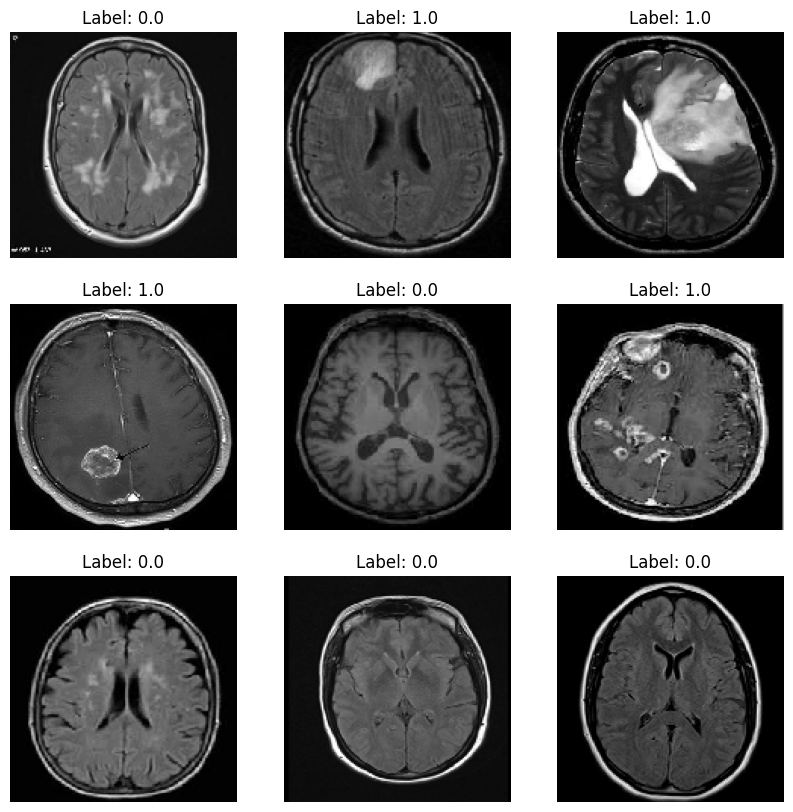

In [5]:
import matplotlib.pyplot as plt

# Afficher quelques images du jeu de données
x_batch, y_batch = next(train_data)  # Récupérer un lot d'images et d'étiquettes
plt.figure(figsize=(10, 10))

for i in range(9):  # Afficher 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"Label: {y_batch[i]}")
    plt.axis('off')
plt.show()

In [6]:
from tensorflow.keras import layers, models

# Créer un modèle CNN simple
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid pour classification binaire
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5956 - loss: 1.0446
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6875 - loss: 0.6142
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7722 - loss: 0.5263
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8438 - loss: 0.3663
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7618 - loss: 0.5468
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8125 - loss: 0.4360
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7886 - loss: 0.4964
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.2819
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8364 - loss: 0.3964
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8438 - loss: 0.3989


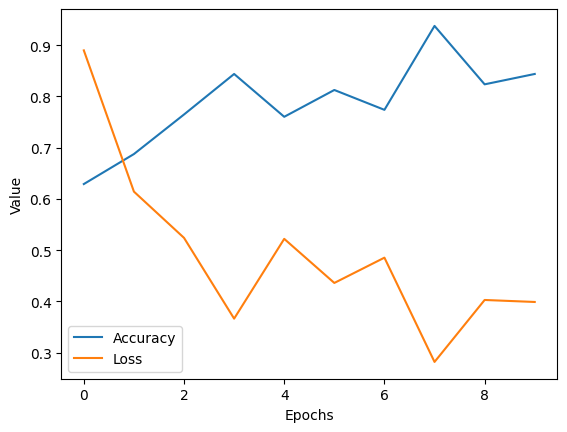

In [7]:
# Entraîner le modèle
history = model.fit(train_data, epochs=10, steps_per_epoch=train_data.samples // 32)

# Afficher l'historique de l'entraînement
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


In [8]:
from google.colab import files

# Téléchargez l'image depuis votre PC
uploaded = files.upload()

# Affichez le nom de l'image téléchargée
for filename in uploaded.keys():
    print(f"Image téléchargée : {filename}")

Saving M_brain.jpg to M_brain.jpg
Saving N_brain.jpg to N_brain.jpg
Saving N_brain2.jpg to N_brain2.jpg
Saving normal_brain.jpg to normal_brain.jpg
Saving P_brain.jpg to P_brain.jpg
Image téléchargée : M_brain.jpg
Image téléchargée : N_brain.jpg
Image téléchargée : N_brain2.jpg
Image téléchargée : normal_brain.jpg
Image téléchargée : P_brain.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
L'image est classée comme 'avec tumeur' (yes).


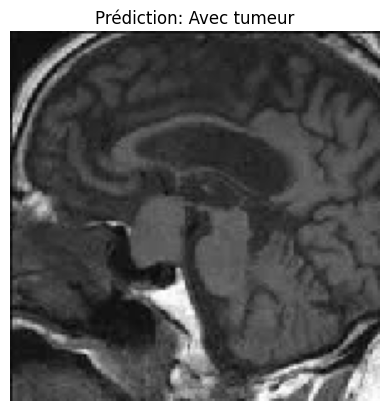

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Récupérer le nom de l'image téléchargée
img_path='/content/P_brain.jpg'

# Charger l'image et la redimensionner
img = image.load_img(img_path, target_size=(150, 150))

# Convertir l'image en tableau numpy et ajouter une dimension (batch_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch

# Normaliser l'image (même prétraitement que pour l'entraînement)
img_array = img_array / 255.0

# Faire une prédiction
prediction = model.predict(img_array)

# Afficher le résultat
if prediction[0] > 0.5:
    print("L'image est classée comme 'avec tumeur' (yes).")
else:
    print("L'image est classée comme 'sans tumeur' (no).")

# Afficher l'image
plt.imshow(img)
plt.title(f"Prédiction: {'Avec tumeur' if prediction[0] > 0.5 else 'Sans tumeur'}")
plt.axis('off')
plt.show()